# FREQUENZA v B USANDO SEGNALE LOCK-IN

---

## 0. inizio dal ricordarmi come ho organizzato i dati

Ho scritto funzioni che leggono le colonne desiderate nei file e producono il grafico.

## 1. Integro 

In [3]:
lockin_integrated = []
spettri_interi = []

False False
0 (408,) (408,)


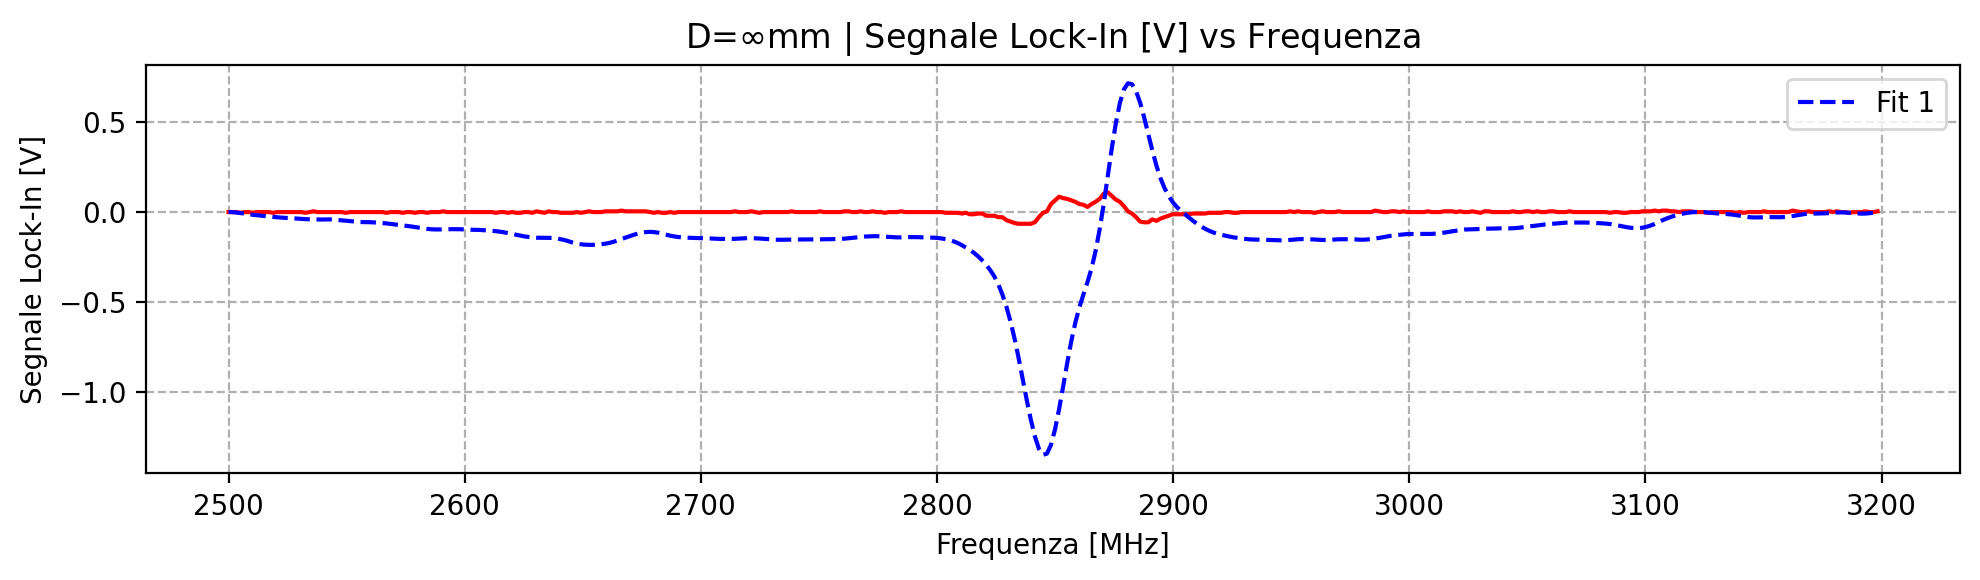

False False
1 (855,) (855,)


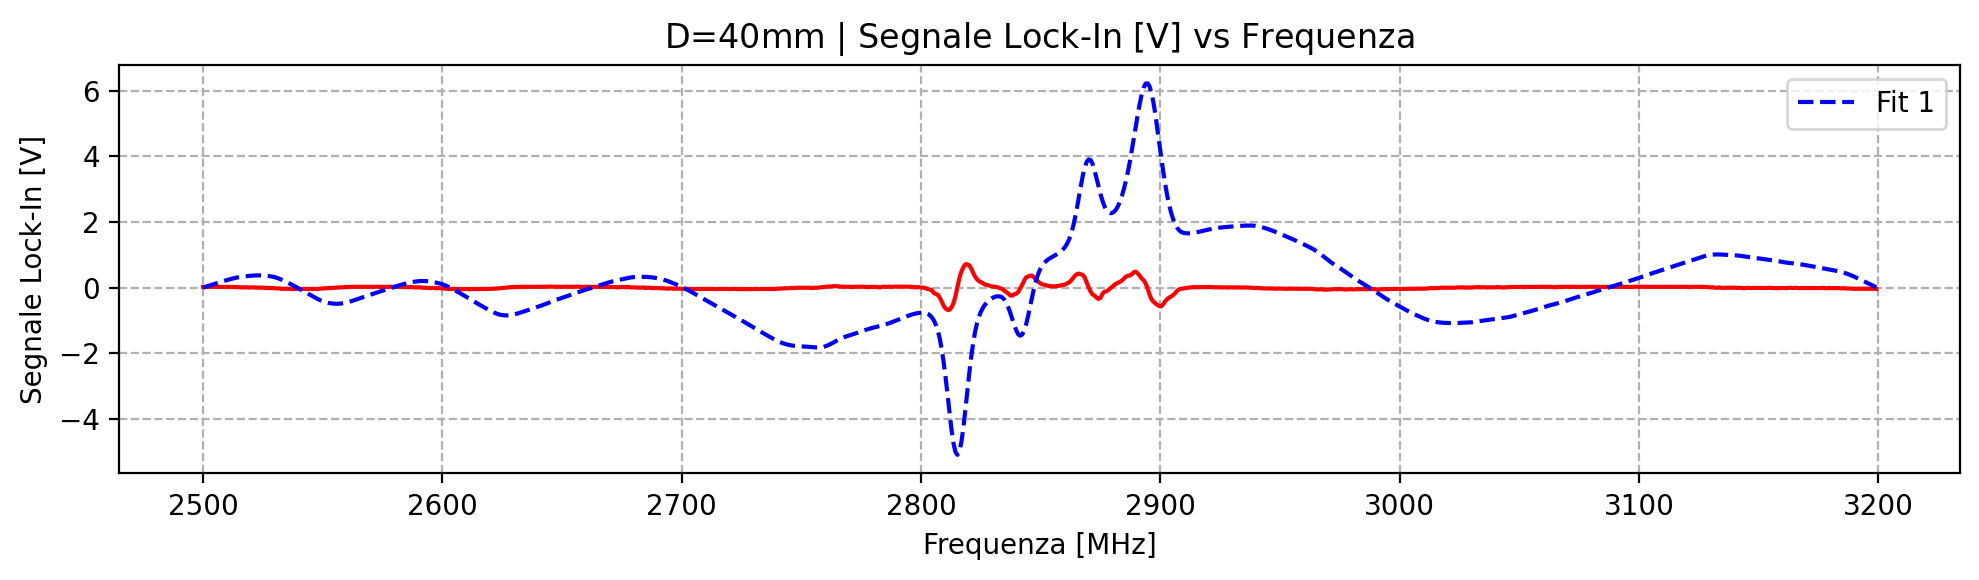

False False
2 (857,) (857,)


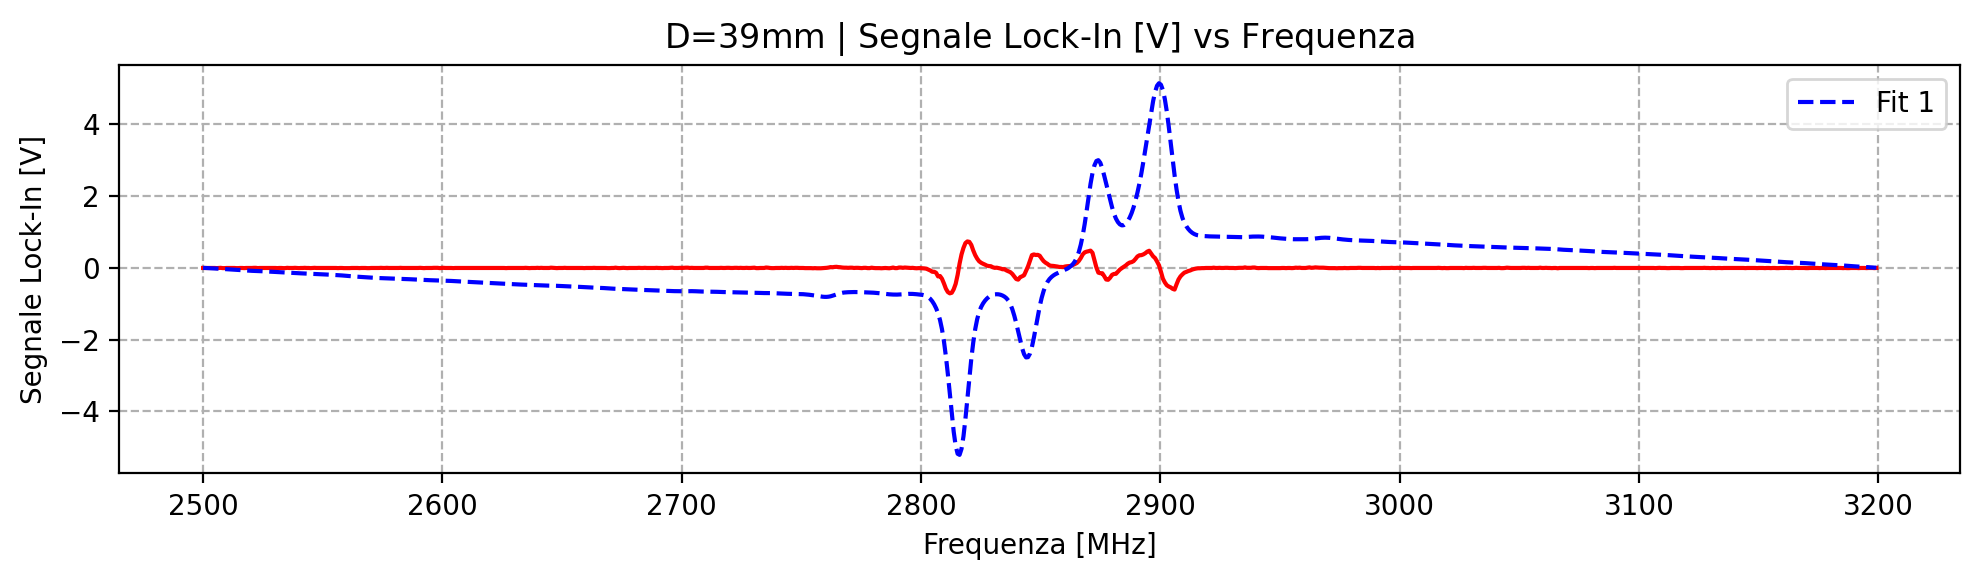

False False
3 (865,) (865,)


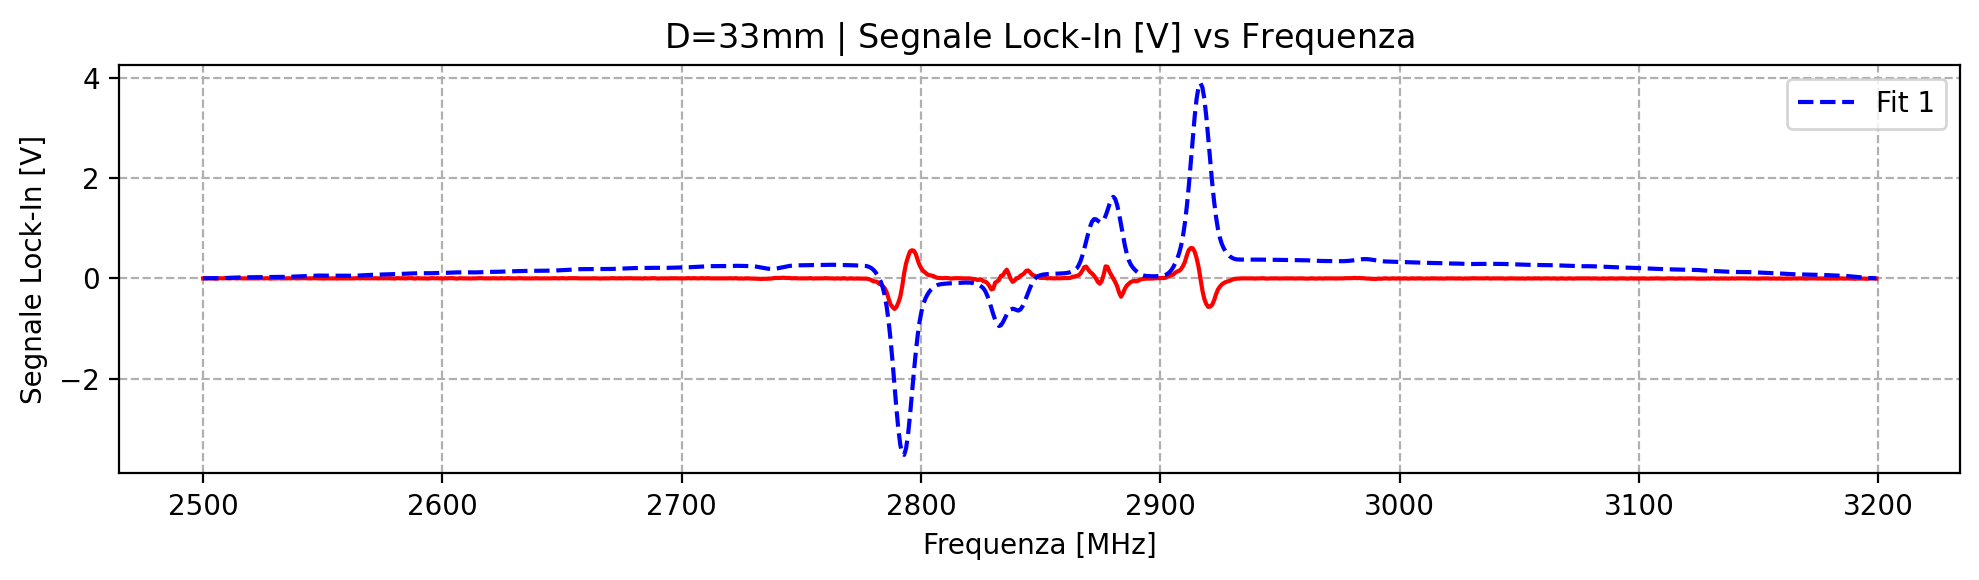

False False
4 (859,) (859,)


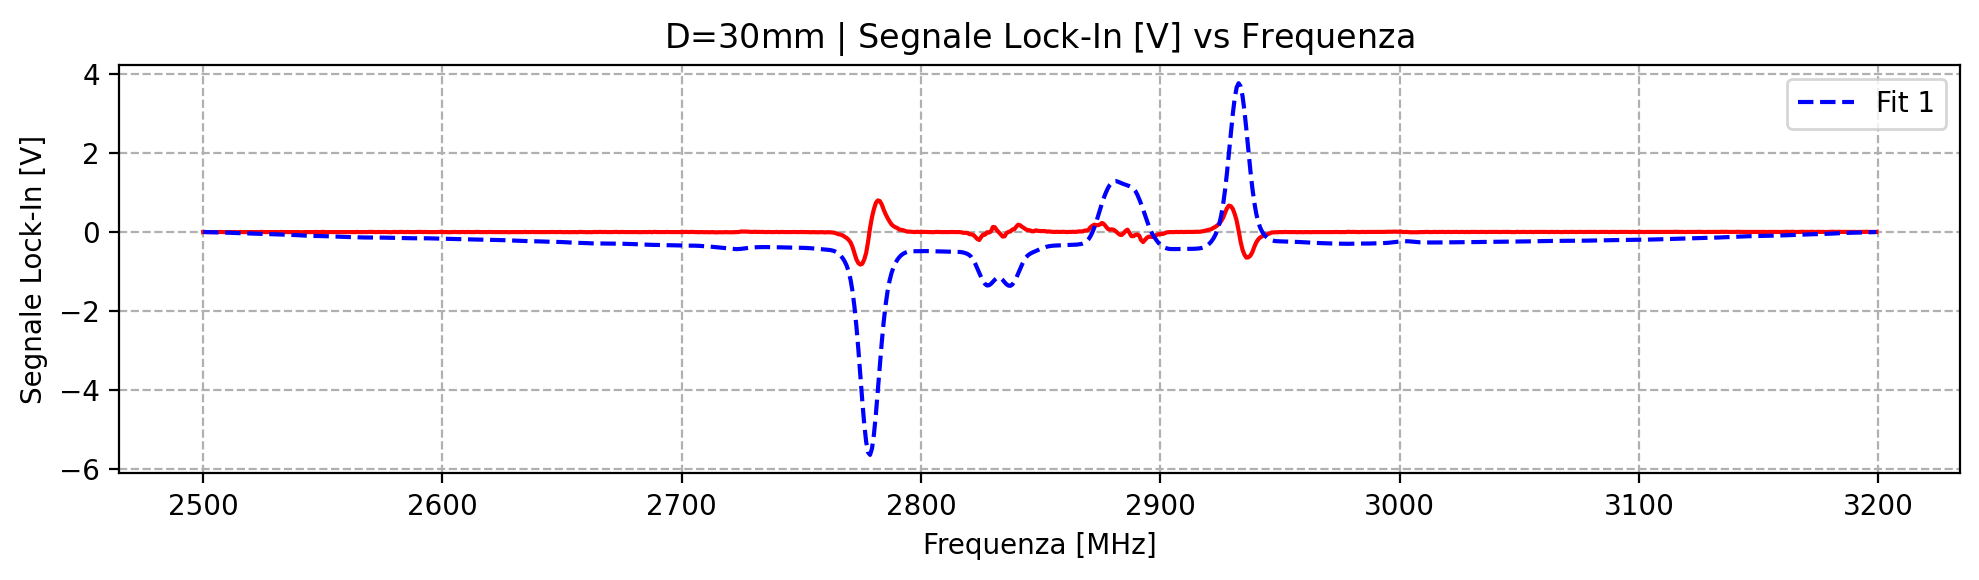

False False
5 (863,) (863,)


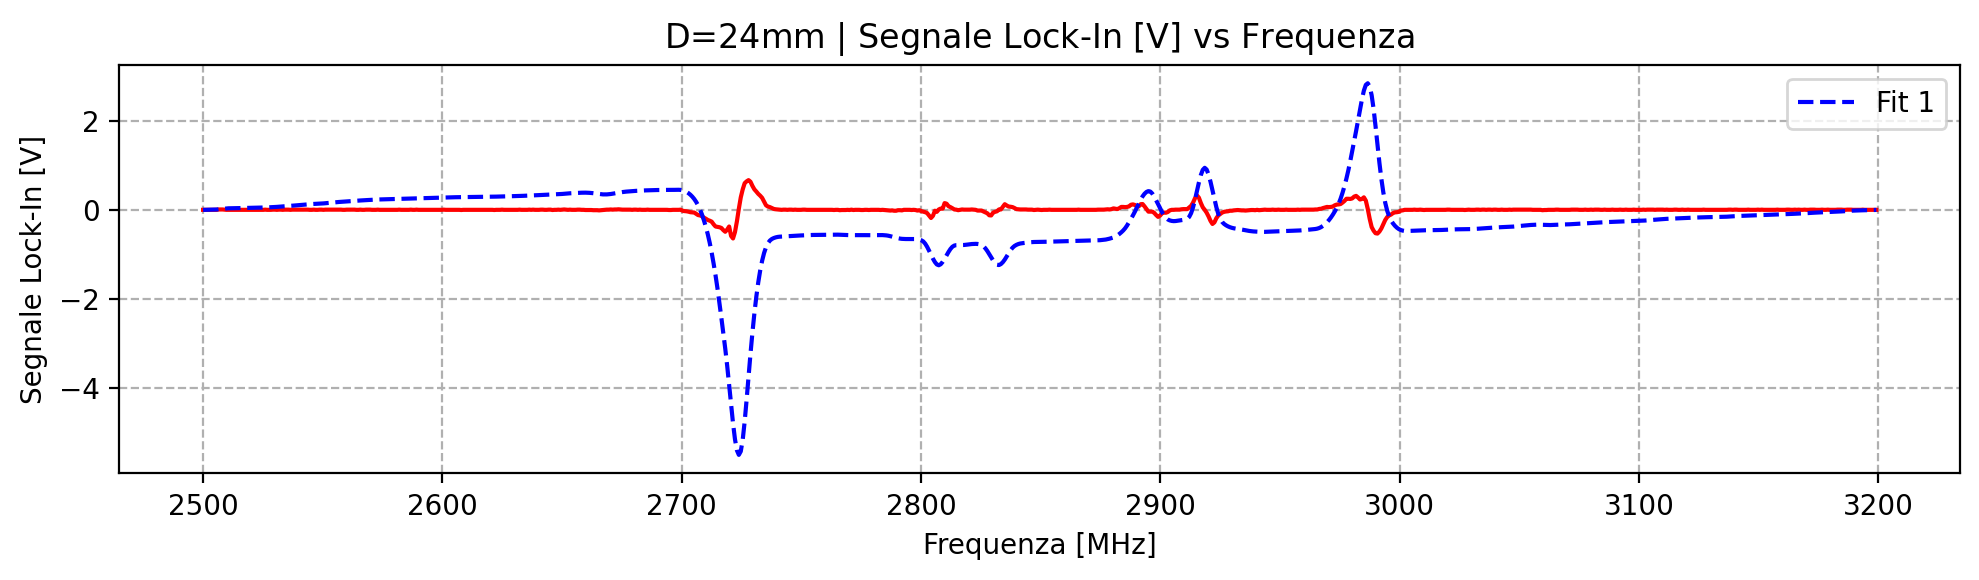

False False
6 (859,) (859,)


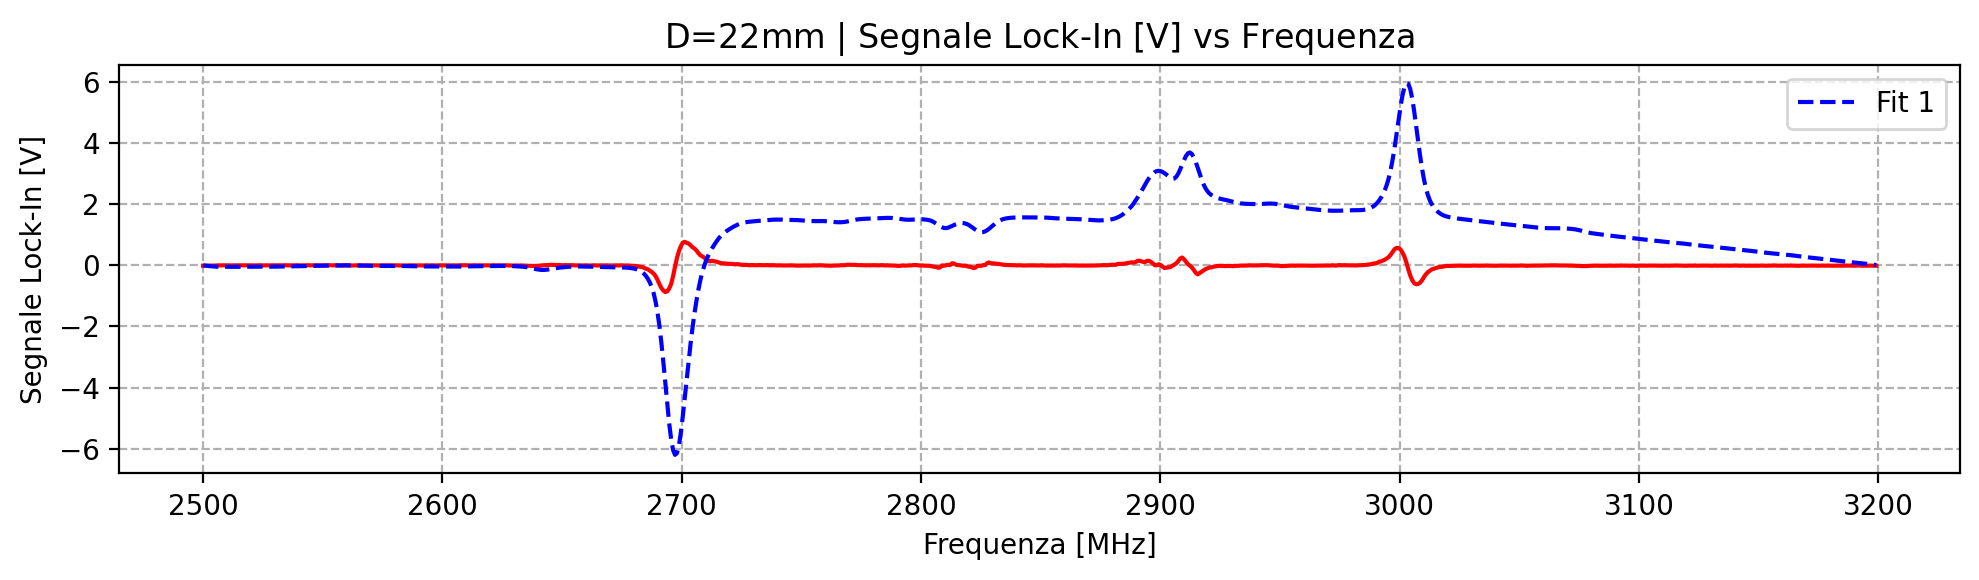

False False
7 (857,) (857,)


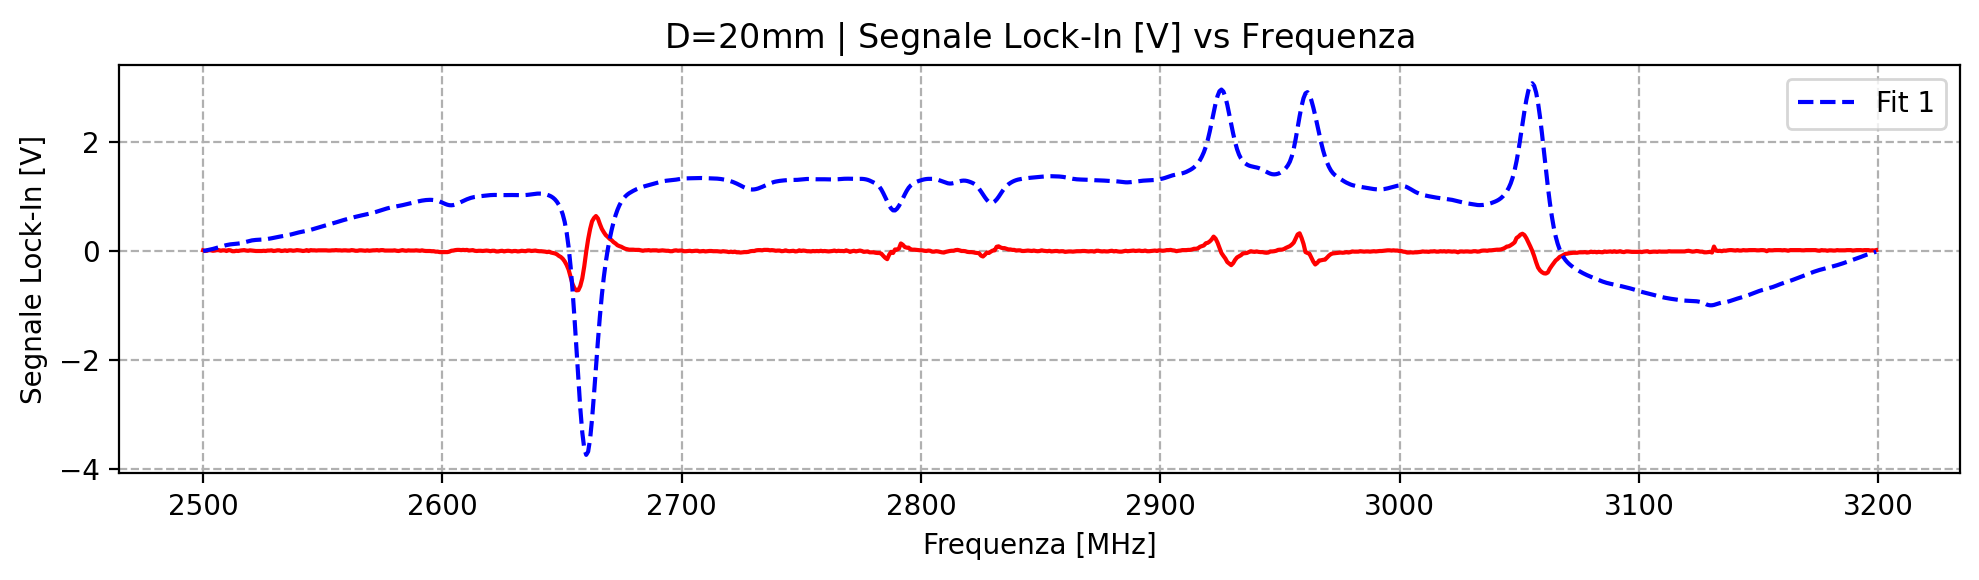

False False
8 (855,) (855,)


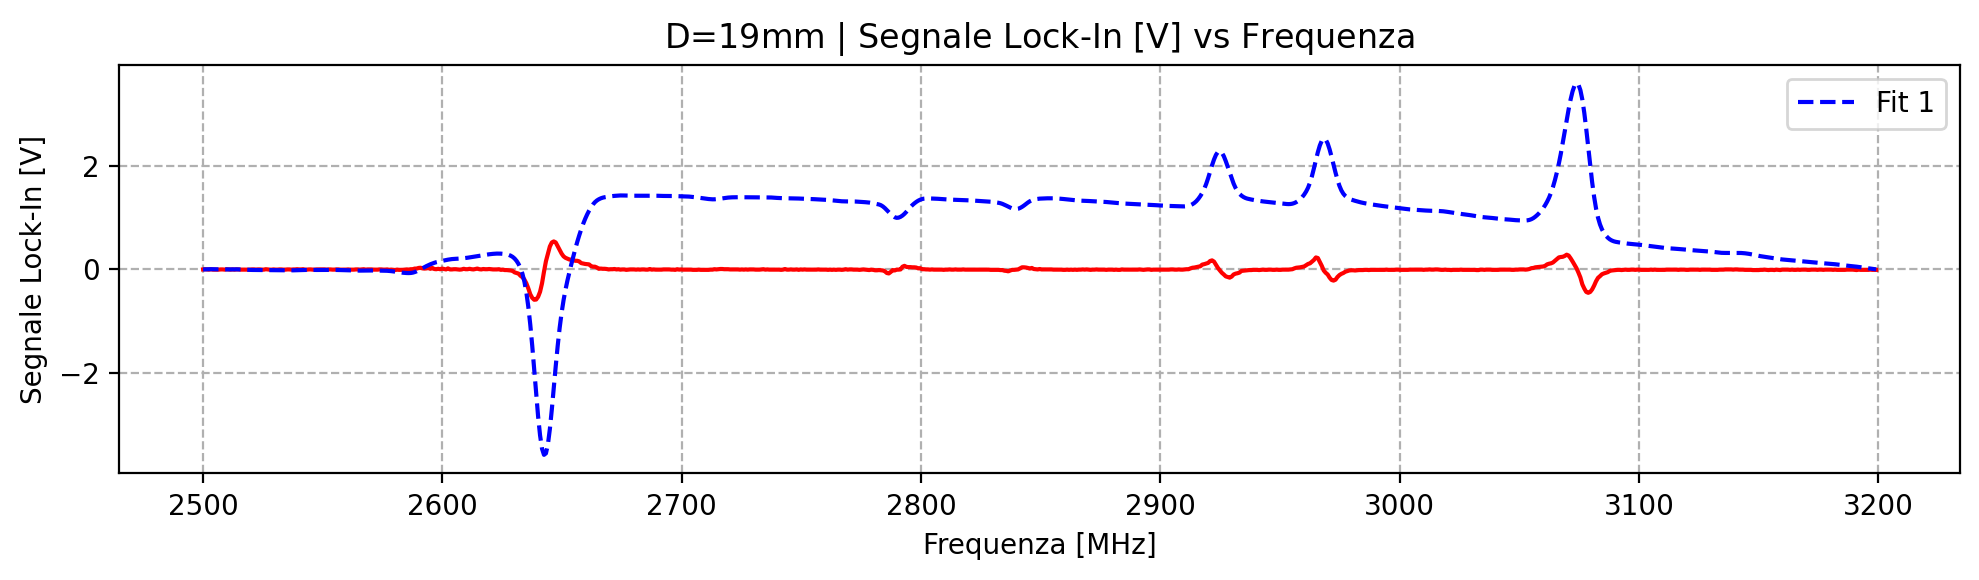

False False
9 (856,) (856,)


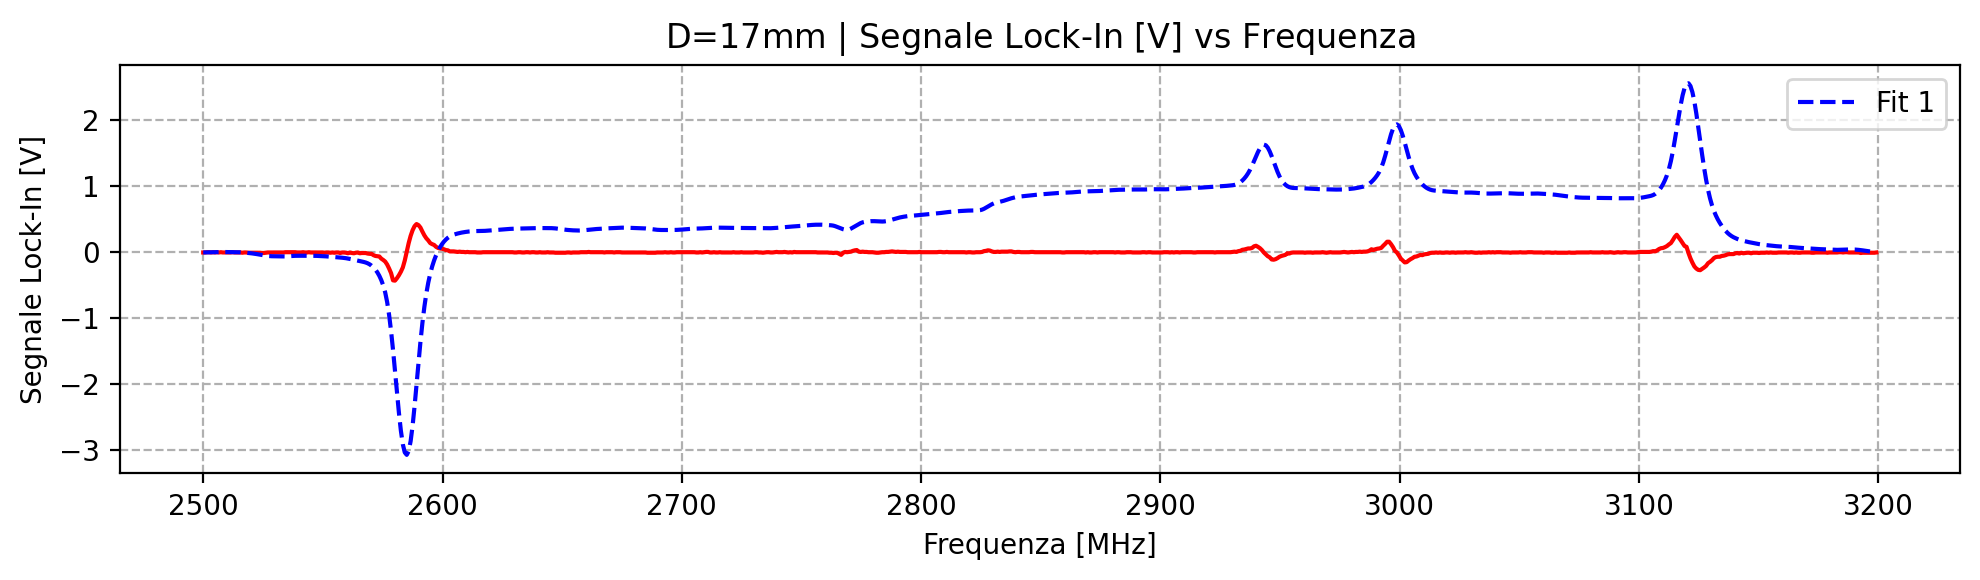

In [4]:

from odmr_subroutines.analysis_subroutines import *
from scipy.integrate import cumulative_trapezoid
from scipy.signal import savgol_filter
from scipy.signal import detrend


def build_name (dist):
    return f"data/cristallo2_aligned_cleaned/odmr_dist_{dist}_cleaned.csv"

distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40, 1000]

for i, dist in enumerate( reversed(distanze) ):
    # costruisco il nome del file
    nome = build_name(dist)
    # leggo il file e immagazzino le informazioni in un oggetto 'spettro' (dizionario)
    spettro = leggi_file_odmr(nome)
    # correggo lo spettro lock-in
    spettro = trasla_spettro_lock_in(spettro)
    spettri_interi.append(spettro)
    
    # Integrazione rispetto alla frequenza
    f = np.asarray(spettro['freq']).ravel()
    l = np.asarray(spettro['lock']).ravel()
    print(np.any(np.isnan(f)), np.any(np.isnan(l)))
    print(i, f.shape, l.shape)  # controllo

    # Filtra il segnale lock-in per rimuovere rumore ad alta frequenza
    l_filtered = savgol_filter(l, window_length=11, polyorder=3)
    
    odmr_raw = cumulative_trapezoid(l_filtered, f, initial=0)
    # Rimuovi trend lineare (baseline) [non c'è bisogno]
    # odmr_raw = detrend(odmr_raw, type='linear')
    
    # plotto lo spettro
    plot_odmr(spettro, key='lock', dist=dist, fit_curves=[(spettro['freq'], odmr_raw)])
    
    lockin_integrated.append(odmr_raw)

## 2. Manipolo l'integrale

Mando tutti i valori positivi in negativi, poi normalizzo.

Inizia da 2850.0
Inizia da 2850.409
Inizia da 2849.592
Inizia da 2849.595
Inizia da 2850.407
Inizia da 2850.406
Inizia da 2850.407
Inizia da 2849.592
Inizia da 2850.409
Inizia da 2850.0


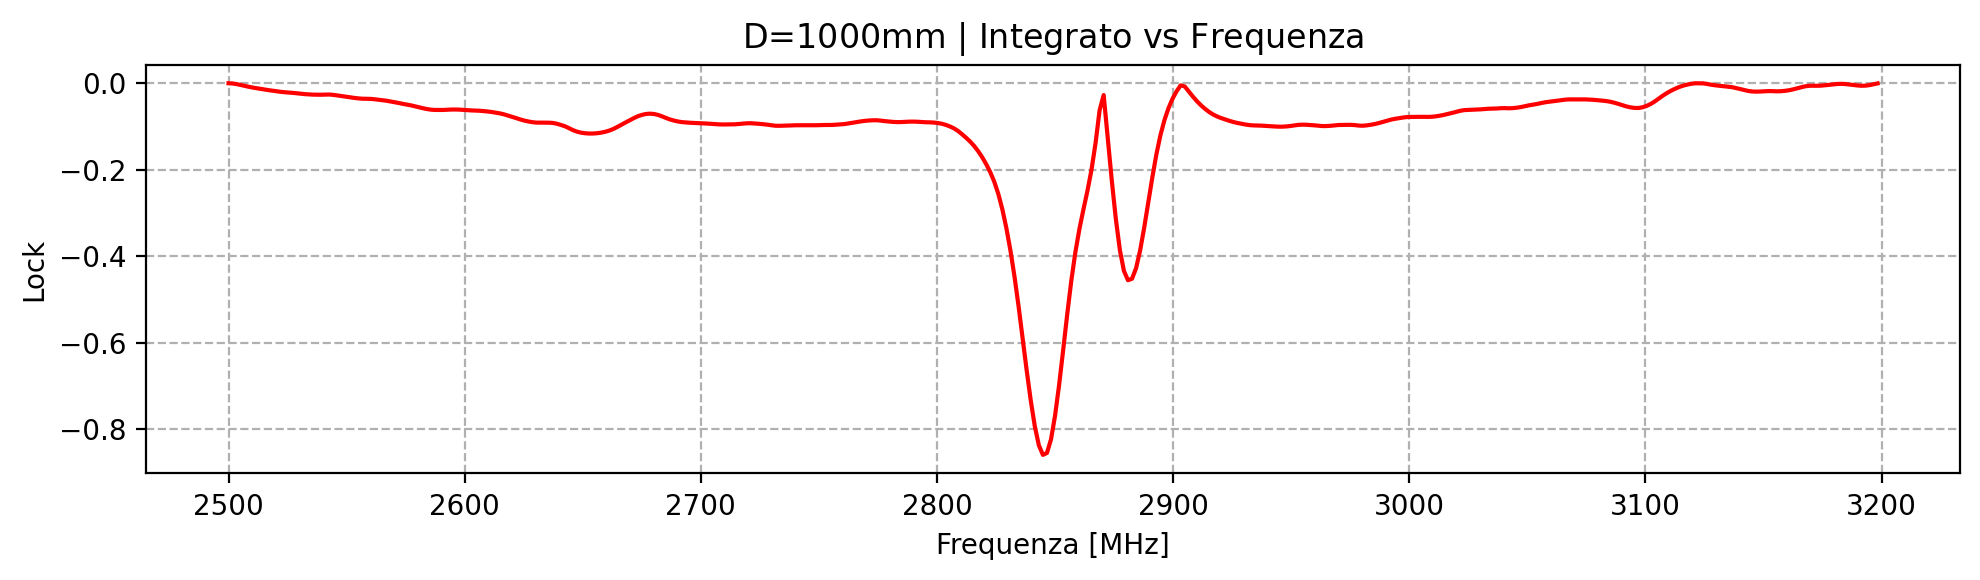

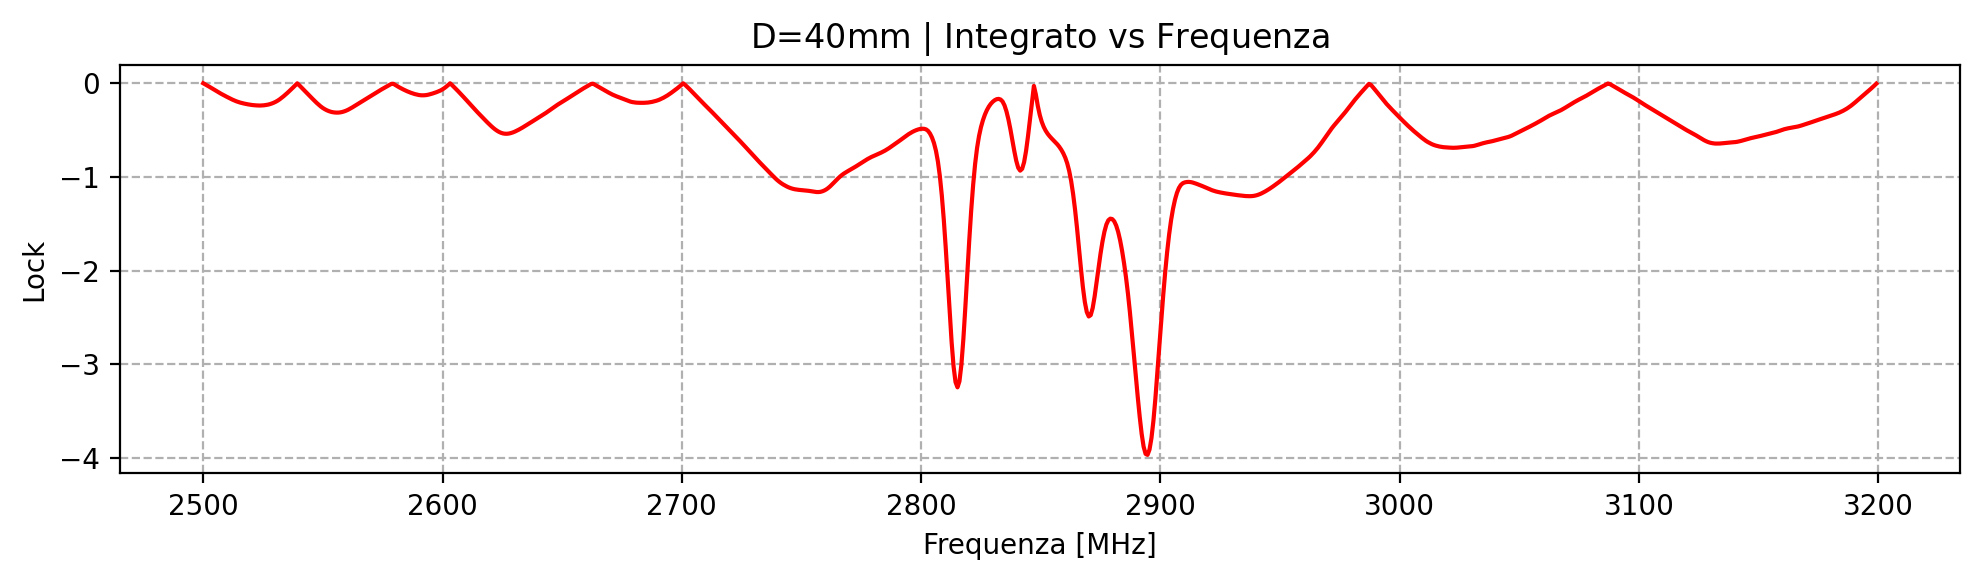

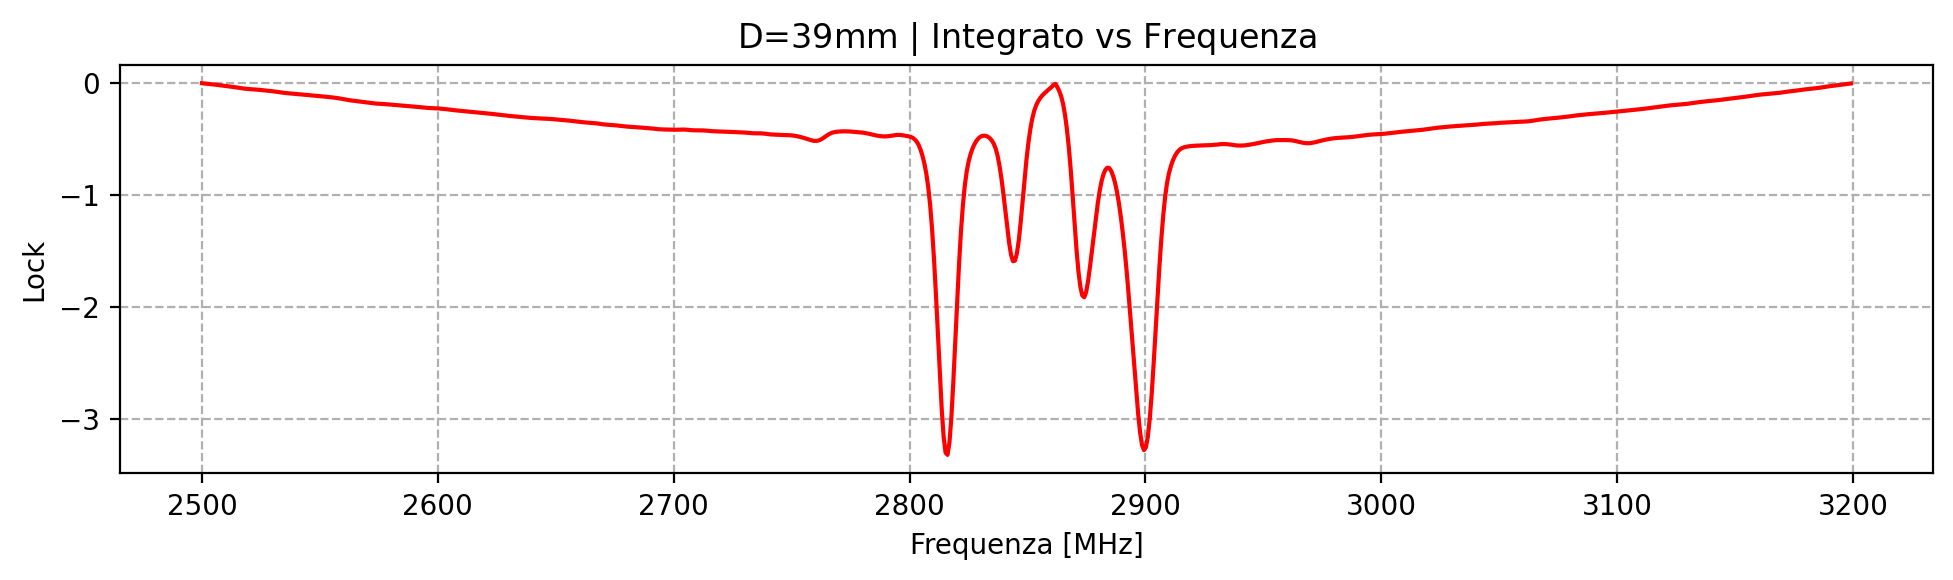

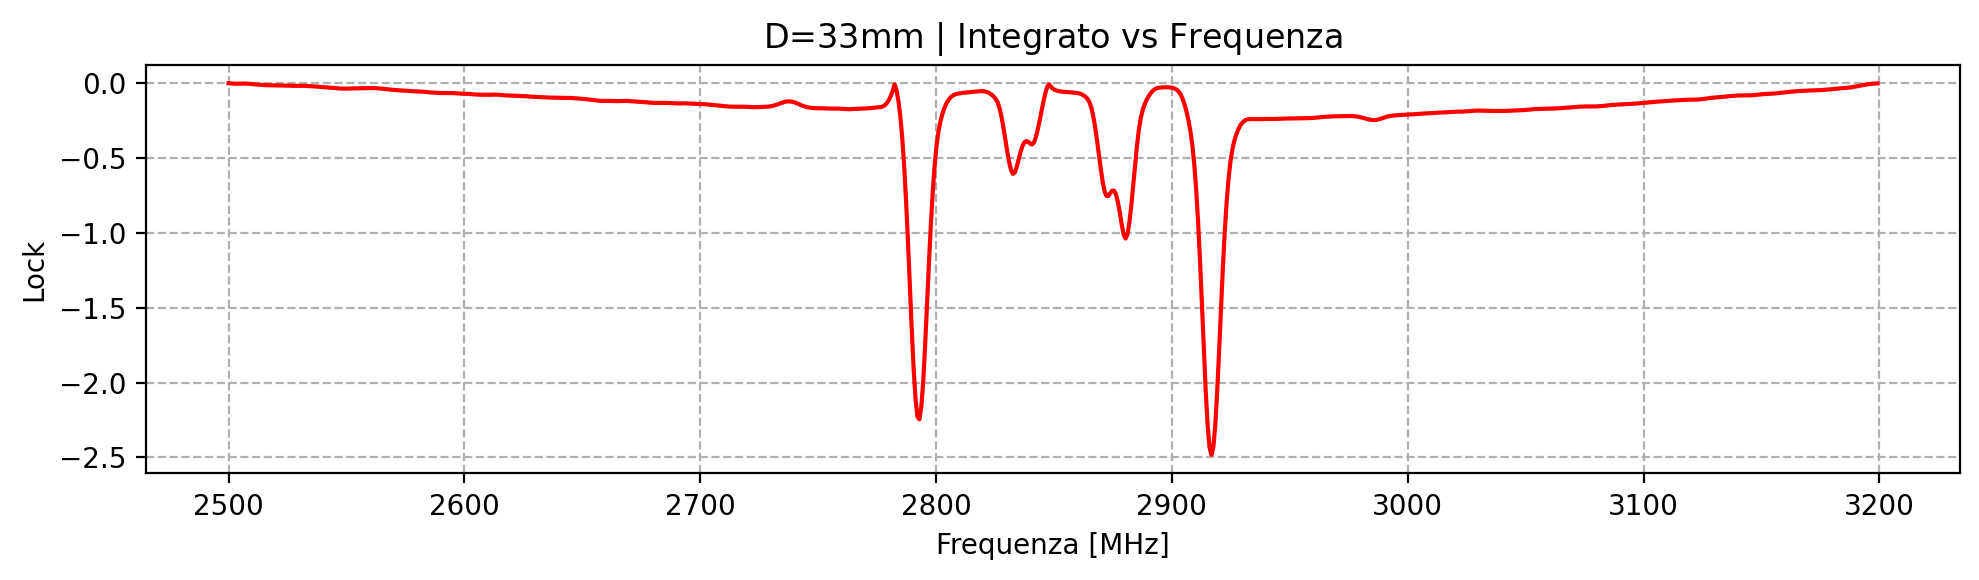

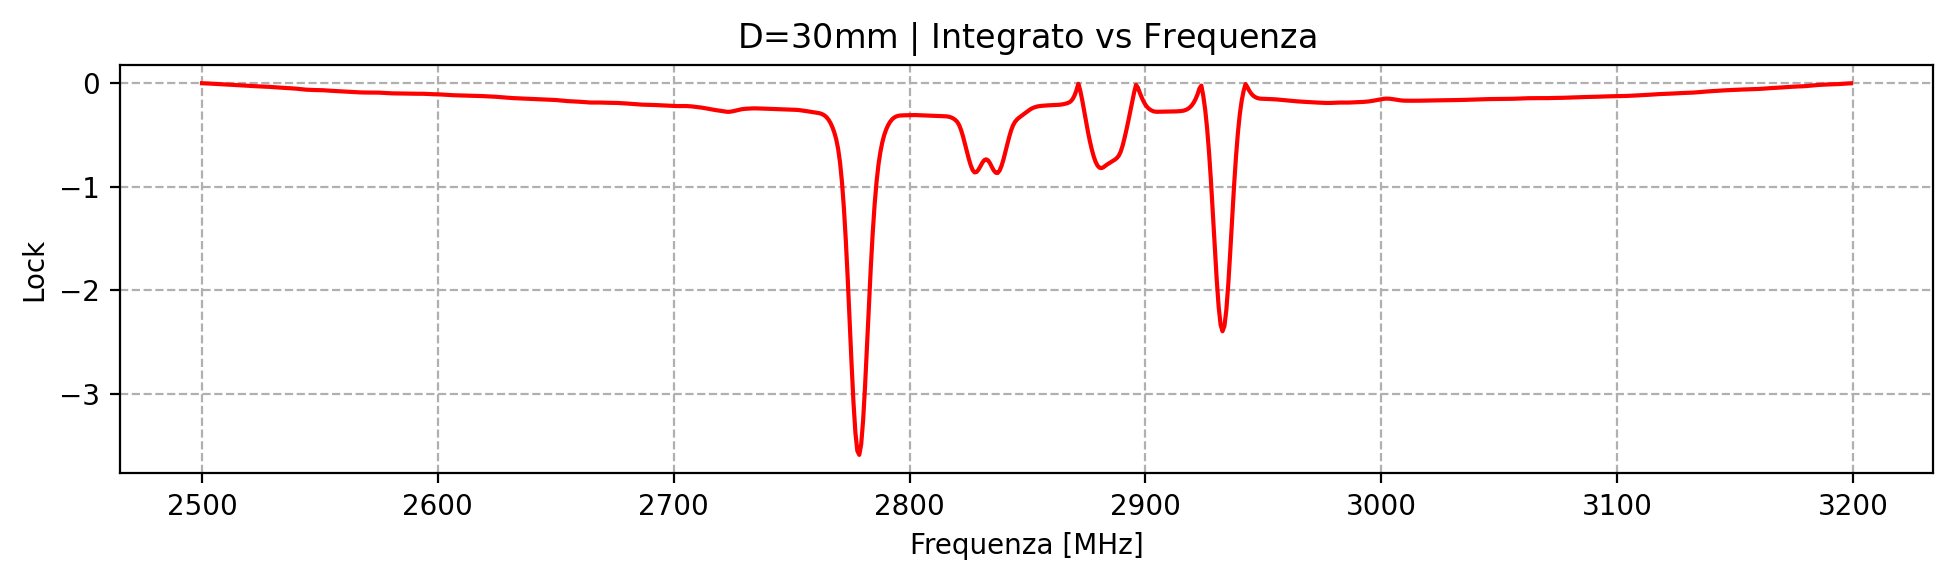

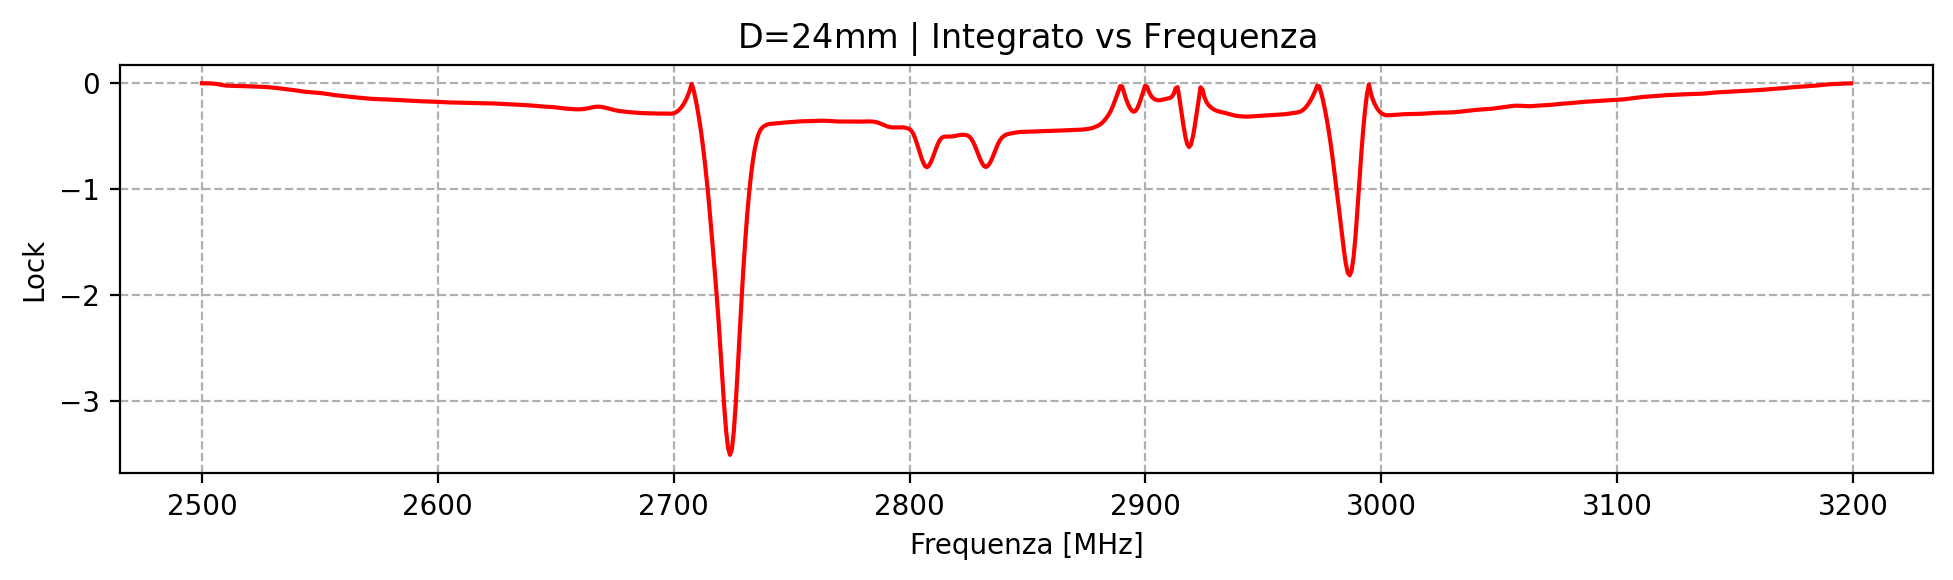

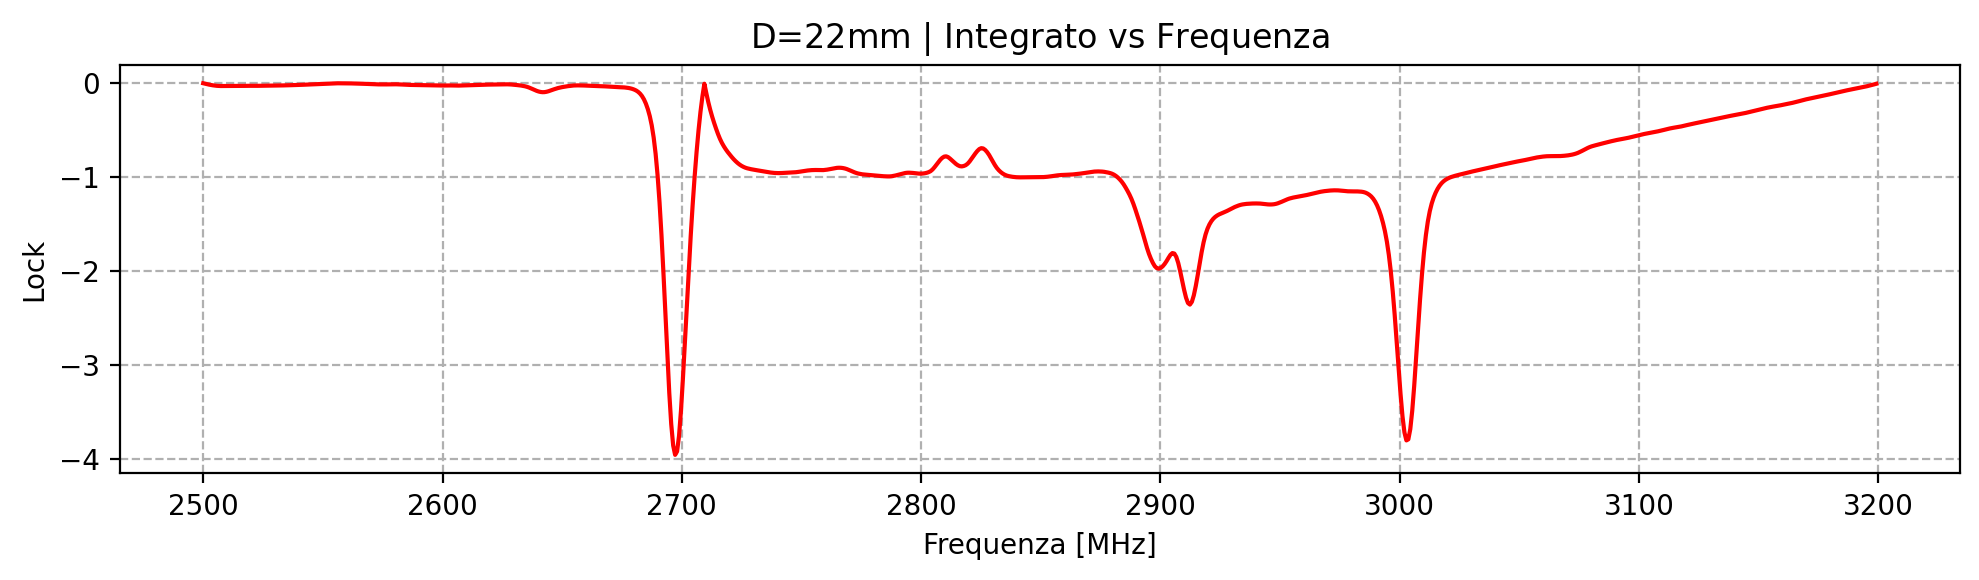

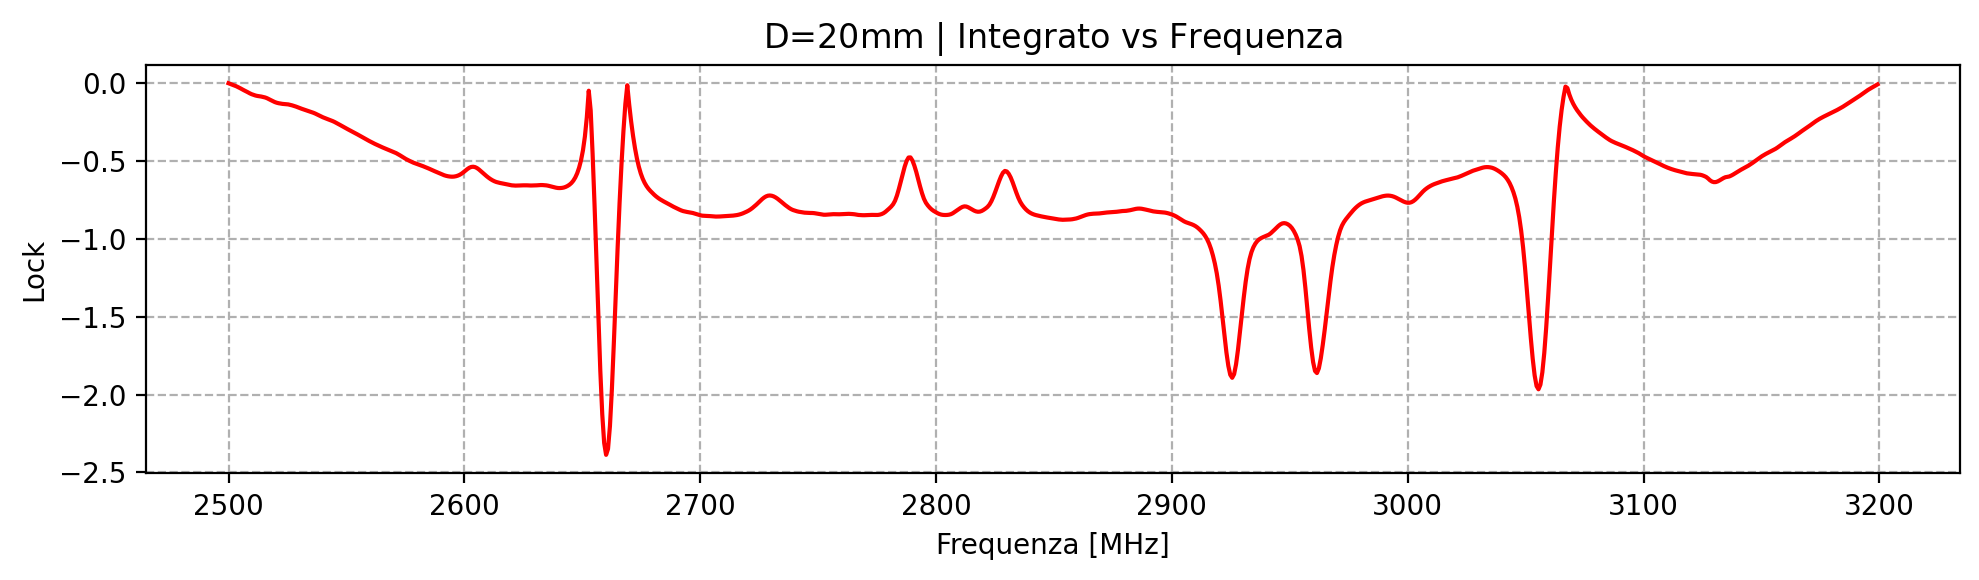

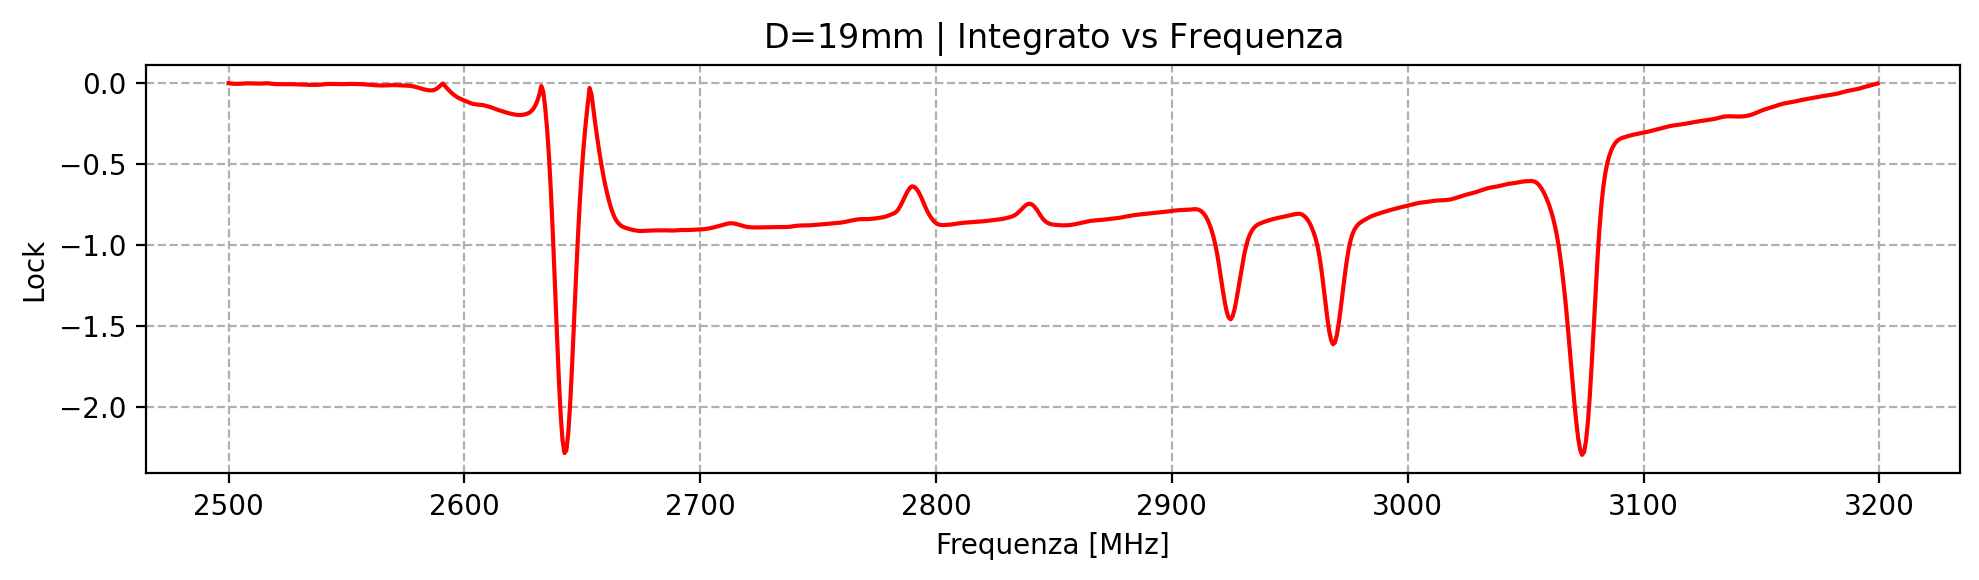

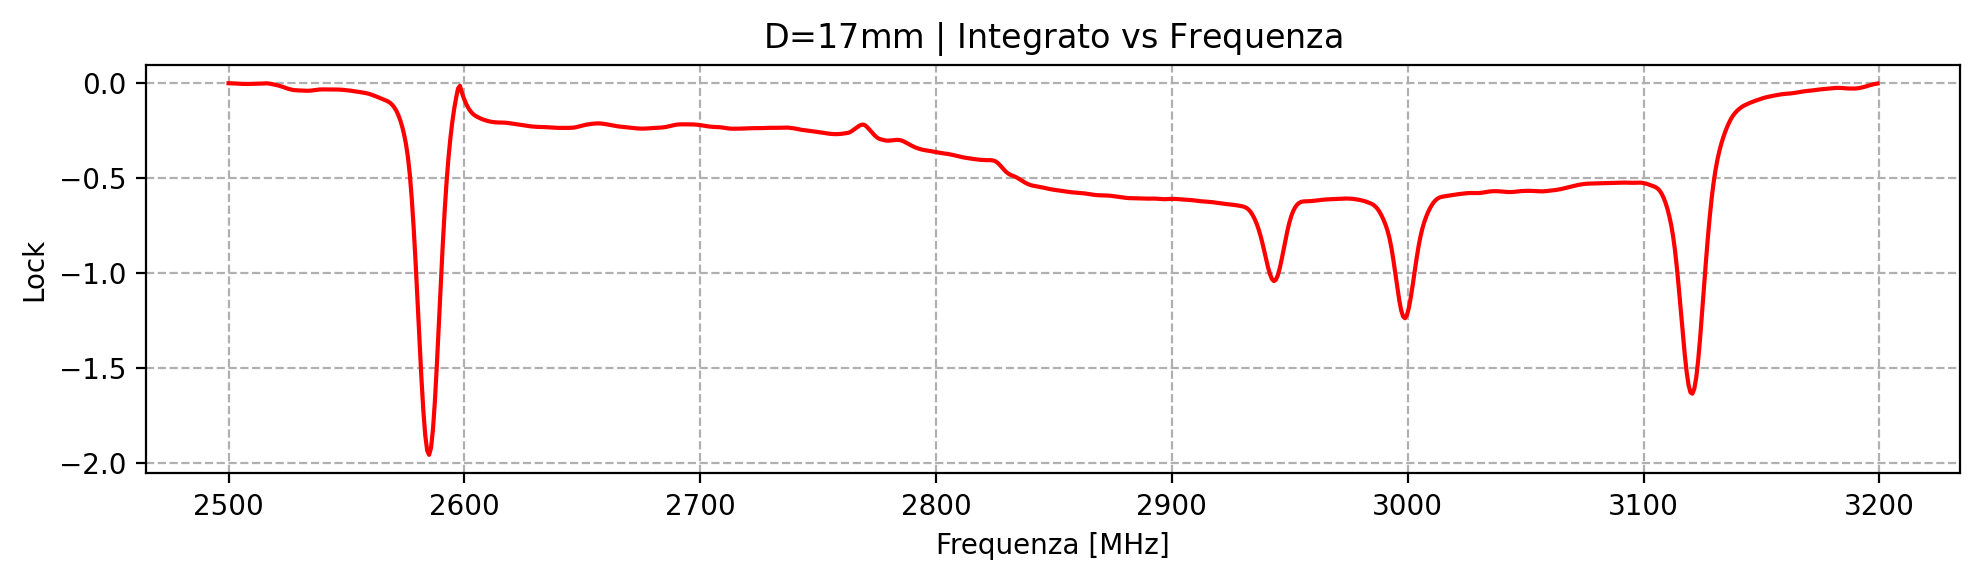

In [17]:
# tutti i positivi in negativi
minimo_ass = 1000
for i, _ in enumerate(lockin_integrated):
    P_M = round(len(lockin_integrated[i]) / 2)
    print(f"Inizia da {spettri_interi[i]['freq'][P_M]}")
    for j, _ in enumerate(lockin_integrated[i][P_M:]):
        lockin_integrated[i][j] = lockin_integrated[i][j] if lockin_integrated[i][j]<0 else -lockin_integrated[i][j]
    if minimo_ass > lockin_integrated[i][j]:
        minimo_ass = lockin_integrated[i][j]
        
# normalizzo
for i, integr in enumerate(lockin_integrated):
    lockin_integrated[i] = np.array(lockin_integrated[i]) / np.abs(minimo_ass)

    # plotto
    plt.figure(figsize=(10, 3), dpi=200)
    plt.plot(spettri_interi[i]['freq'], lockin_integrated[i] , color='red')    
    plt.xlabel('Frequenza [MHz]')
    plt.ylabel('Lock')
    plt.title(rf"D=${distanze[-i-1]}$mm | Integrato vs Frequenza")
    plt.grid(linestyle='--')
    plt.tight_layout()
    plt.show()
